# Exploratory Data Analysis with Retail Store Data

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Report2 = pd.read_csv('Daily_Sales_ERPNext.csv')
Report2 = Report2[Report2['Company'] == 'WHITETREE RETAIL LIMITED']

In [83]:
Report = pd.read_csv('Sample-Superstore.csv')
Report.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [4]:
Report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
Report.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# Overall Profit earn by the store
Report.Profit.sum()

286397.0217

In [7]:
# Find Unique value in the categorical column
Report.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [8]:
Report.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [9]:
Report['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [10]:
Report['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [11]:
Report.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [12]:
Report.Country.unique()

array(['United States'], dtype=object)

In [13]:
Report.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [14]:
Report.groupby('Segment').sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,,
Consumer,25581329,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,15504734,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,8858952,98157713,4.296531e+05,6744,262.33,60298.6785


Text(0.5, 1.0, 'Segment wise Profit')

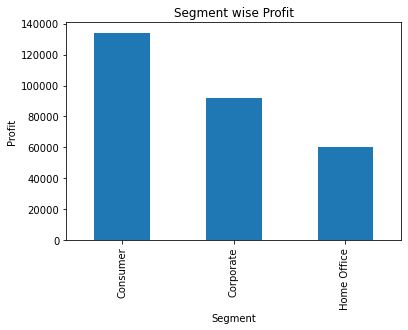

In [15]:
## Plot of Segment wise Profit
Report.groupby('Segment').sum().Profit.plot(kind ='bar')
plt.ylabel('Profit')
plt.title('Segment wise Profit')

In [16]:
Report.groupby('Category').sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,,
Furniture,10693326,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,30010535,330772872,719047.0320,22906,947.80,122490.8008
Technology,9241154,102603754,836154.0330,6939,244.40,145454.9481


Text(0.5, 1.0, 'Category wise Profit')

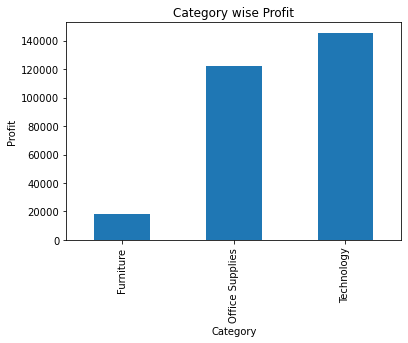

In [17]:
## Plot of Segment wise Profit
Report.groupby('Category').sum().Profit.plot(kind ='bar')
plt.ylabel('Profit')
plt.title('Category wise Profit')

In [18]:
Report.groupby('Sub-Category').sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,,
Accessories,3928080,44468434,167380.3180,2976,60.80,41936.6357
Appliances,2407754,25250538,107532.1610,1729,77.60,18138.0054
Art,3920109,43329658,27118.7920,3000,59.60,6527.7870
Binders,7633935,83626398,203412.7330,5974,567.00,30221.7633
Bookcases,1156535,12771539,114879.9963,868,48.14,-3472.5560
Chairs,3121503,34936229,328449.1030,2356,105.00,26590.1663
Copiers,355661,3873477,149528.0300,234,11.00,55617.8249
Envelopes,1207903,13325731,16476.4020,906,20.40,6964.1767
Fasteners,1017287,12506063,3024.2800,914,17.80,949.5182


Text(0.5, 1.0, 'Sub-Category wise Profit')

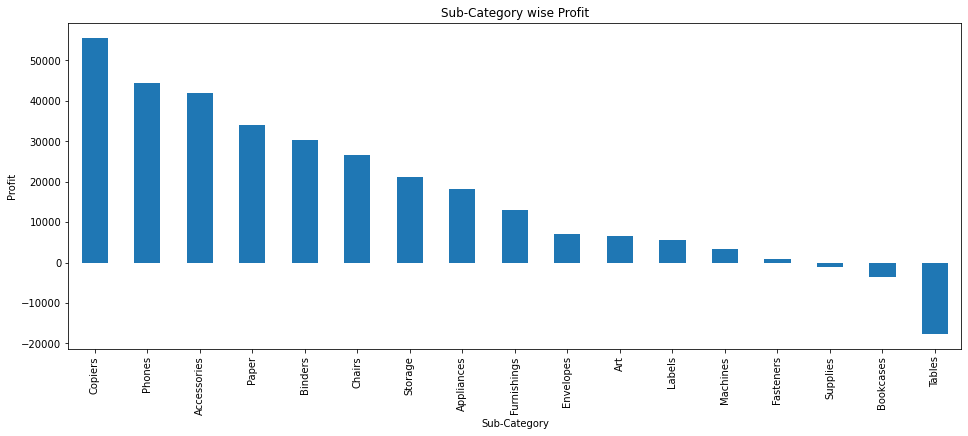

In [19]:
## Plot of Segment wise Profit
plt.figure(figsize = (16,6))
Report.groupby('Sub-Category').sum().Profit.sort_values(ascending= False).plot(kind ='bar')
plt.ylabel('Profit')
plt.title('Sub-Category wise Profit')

##### Loss making subcategories : Supplies, Boocase & Tables

##### Margin profit making subcategories: Fasterers

##### These Sub-Categories are weak area which needs additional focus

##### Higest profit making Sub-Categories: Copiers, Phones & Accessories

In [20]:
Report.groupby(['Sub-Category','Segment']).sum()

Row ID  Postal Code        Sales  Quantity  \
Sub-Category Segment                                                    
Accessories  Consumer     1961721     23423012   87105.2380      1578   
             Corporate    1231766     13699948   48190.5640       881   
             Home Office   734593      7345474   32084.5160       517   
Appliances   Consumer     1256412     13054741   52819.5810       908   
             Corporate     828588      8231251   36588.6830       569   
             Home Office   322754      3964546   18123.8970       252   
Art          Consumer     2071152     23698696   14251.9300      1625   
             Corporate    1082436     11014603    8590.4480       850   
             Home Office   766521      8616359    4276.4140       525   
Binders      Consumer     3823698     42709303  118161.0090      3015   
             Corporate    2454433     25911708   51560.3130      1848   
             Home Office  1355804     15005387   33691.4110      1111   
Bookcases    Consumer      676937      7413225   68632.7290       496   
             Corporate     326203      3576136   34005.9243       271   
             Home Office   153395      1782178   12241.3430       101   
Chairs       Consumer     1635121     18098256  172862.7420      1234   
             Corporate     986042     11027726   99140.8780       719   
             Home Office   500340      5810247   56445.4830       403   
Copiers      Consumer      186282      2040928   69819.0700       117   
             Corporate     106171      1184078   46829.3860        70   
             Home Office    63208       648471   32879.5740        47   
Envelopes    Consumer      575762      6727810    7771.1460       442   
             Corporate     430098      4342996    5942.6700       323   
             Home Office   202043      2254925    2762.5860       141   
Fasteners    Consumer      526676      6837103    1680.9420       473   
             Corporate     271593      3046925     783.2900       273   
             Home Office   219018      2622035     560.0480       168   
Furnishings  Consumer     2517119     27874636   49620.0460      1834   
             Corporate    1489457     14222935   25001.2660      1086   
             Home Office   836048      9782859   17083.8520       643   
Labels       Consumer      981719      9916769    6709.2620       715   
             Corporate     499564      5762182    4101.6460       398   
             Home Office   335971      3874034    1675.4040       287   
Machines     Consumer      308085      3166340   79542.8250       217   
             Corporate     137221      1951214   60276.7550       141   
             Home Office   116122      1247114   49419.0510        82   
Paper        Consumer     3412257     38844283   36324.3680      2602   
             Corporate    2098927     23120568   23883.1300      1555   
             Home Office  1374906     14334370   18271.7080      1021   
Phones       Consumer     2198832     24241749  169932.7640      1685   
             Corporate    1385859     14553958   91153.4140      1003   
             Home Office   811294      9101468   68920.8760       601   
Storage      Consumer     2174033     25864944  100492.4020      1619   
             Corporate    1284771     13338502   79790.9980      1000   
             Home Office   667845      7045274   43560.2080       539   
Supplies     Consumer      516125      5371200   25741.4960       359   
             Corporate     332852      3631876   19435.2840       202   
             Home Office   144577      1630482    1496.7580        86   
Tables       Consumer      759398      9595614   99933.7950       602   
             Corporate     558753      5919724   70871.7175       419   
             Home Office   254513      3092490   36160.0195       220   

                          Discount      Profit  
Sub-Category Segment                            
Accessories  Consumer        35.00  20735.9225  
          

### Plot Segment wise + Sub-Category wise Profit

Text(0.5, 1.0, 'Segment + Sub-Category wise Profit')

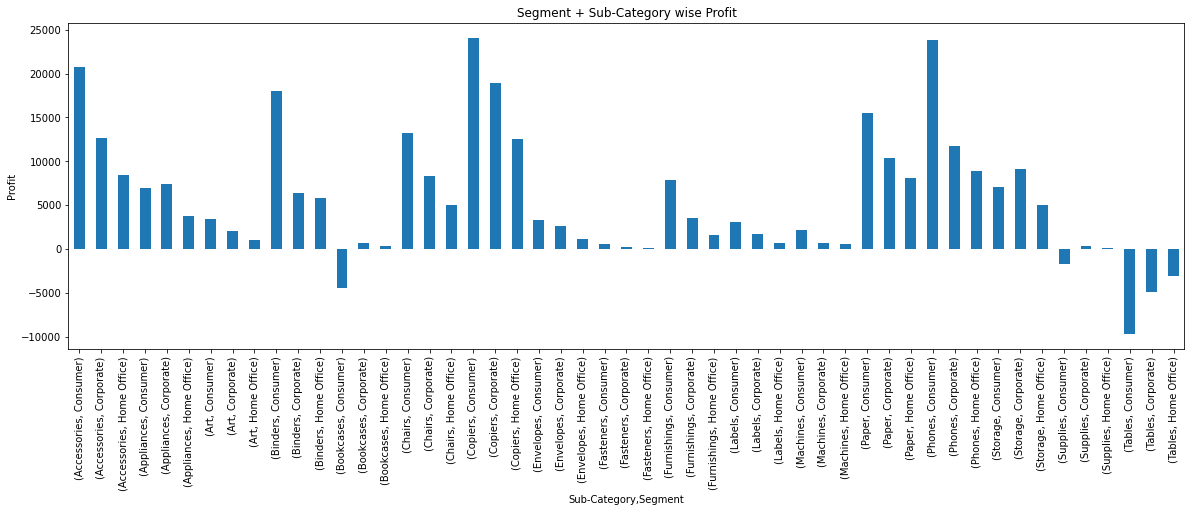

In [21]:
plt.figure(figsize = (20,6))
Report.groupby(['Sub-Category','Segment']).sum().Profit.plot(kind='bar')
plt.ylabel('Profit')
plt.title('Segment + Sub-Category wise Profit')

##### Loss making Sub-Categories & Segment: Bookcases-Consumer, Supplies-Consumer & All Tables

In [22]:
Report.groupby(['Category','Sub-Category']).sum()

Row ID  Postal Code        Sales  Quantity  \
Category        Sub-Category                                                
Furniture       Bookcases     1156535     12771539  114879.9963       868   
                Chairs        3121503     34936229  328449.1030      2356   
                Furnishings   4842624     51880430   91705.1640      3563   
                Tables        1572664     18607828  206965.5320      1241   
Office Supplies Appliances    2407754     25250538  107532.1610      1729   
                Art           3920109     43329658   27118.7920      3000   
                Binders       7633935     83626398  203412.7330      5974   
                Envelopes     1207903     13325731   16476.4020       906   
                Fasteners     1017287     12506063    3024.2800       914   
                Labels        1817254     19552985   12486.3120      1400   
                Paper         6886090     76299221   78479.2060      5178   
                Storage       4126649     46248720  223843.6080      3158   
                Supplies       993554     10633558   46673.5380       647   
Technology      Accessories   3928080     44468434  167380.3180      2976   
                Copiers        355661      3873477  149528.0300       234   
                Machines       561428      6364668  189238.6310       440   
                Phones        4395985     47897175  330007.0540      3289   

                              Discount      Profit  
Category        Sub-Category                        
Furniture       Bookcases        48.14  -3472.5560  
                Chairs          105.00  26590.1663  
                Furnishings     132.40  13059.1436  
                Tables           83.35 -17725.4811  
Office Supplies Appliances       77.60  18138.0054  
                Art              59.60   6527.7870  
                Binders         567.00  30221.7633  
                Envelopes        20.40   6964.1767  
                Fasteners        17.80    949.5182  
                Labels           25.00   5546.2540  
                Paper           102.60  34053.5693  
                Storage          63.20  21278.8264  
                Supplies         14.60  -1189.0995  
Technology      Accessories      60.80  41936.6357  
                Copiers          11.00  55617.8249  
                Machines         35.20   3384.7569  
                Phones          137.40  44515.7306

In [23]:
Loss = Report.loc[Report.Profit<0]
Loss.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522


In [33]:
Loss.groupby('Region').sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,,
Central,3886906,52868399,141282.6588,2803,407.14,-56314.8850
East,2791979,15129951,160864.0120,1988,247.10,-49590.6075
South,1397610,8511782,91635.1850,1004,127.35,-27504.8323
West,1510445,28249259,74925.2990,1245,118.15,-22720.9609


Text(0.5, 1.0, 'Region wise Loss')

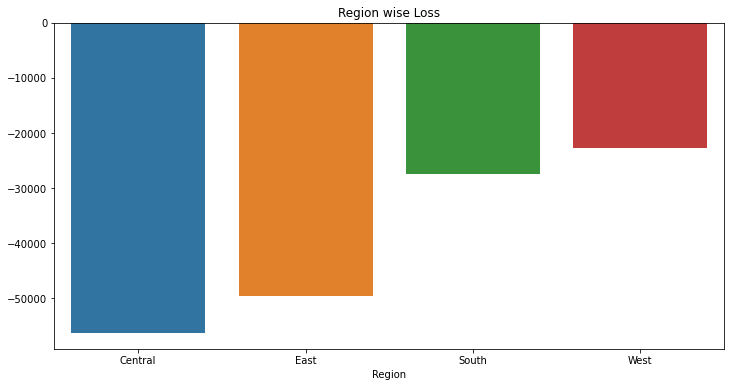

In [53]:
plt.figure(figsize = (12,6))
sns.barplot(x=Loss.groupby('Region').sum().Profit.index, 
            y=Loss.groupby('Region').sum().Profit.values)
plt.title('Region wise Loss')

##### The Central accounts for the most loss, followed by East, South & West

In [57]:
Profit = Report.loc[Report.Profit>0]
Profit.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694


In [58]:
Profit.groupby('Region').sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,,
Central,7737583,98179442,355822.9170,5932,148.90,96021.2475
East,11187846,34731228,509215.9260,8550,164.50,141113.3875
South,6760194,46946712,294021.3920,5146,109.80,74254.2626
West,14340660,263461931,641746.6235,10950,229.85,131139.4098


Text(0.5, 1.0, 'Region wise Profit')

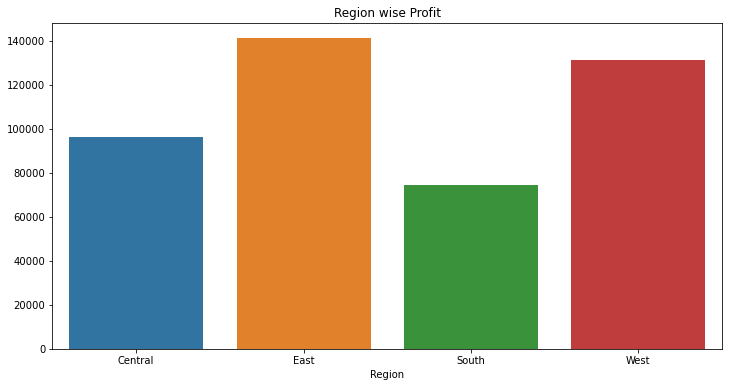

In [61]:
plt.figure(figsize = (12,6))
sns.barplot(x=Profit.groupby('Region').sum().Profit.index, 
            y=Profit.groupby('Region').sum().Profit.values)
plt.title('Region wise Profit')

##### The most profitable is the East followed by the West Central & South

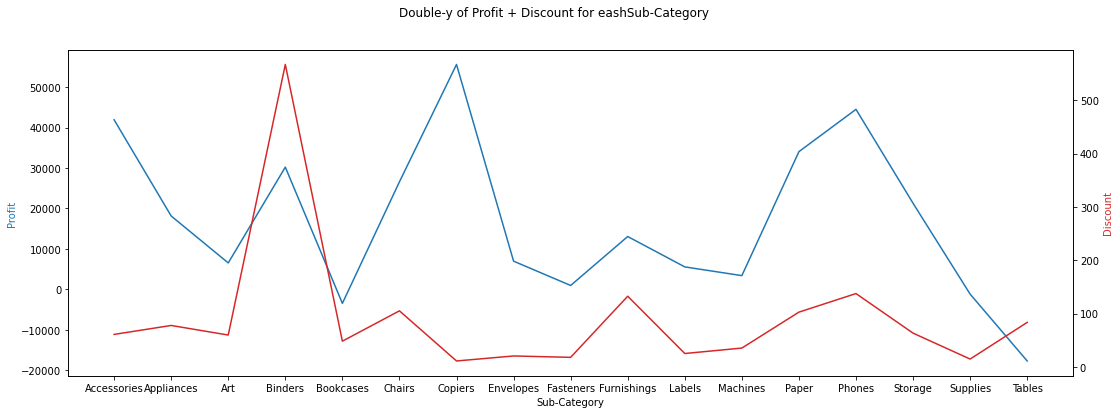

In [72]:
# Double-y plot of subcategory wise Profit & Discount to find the correlation
fig,ax1 = plt.subplots(figsize = (18,6))
fig.suptitle ('Double-y of Profit + Discount for eashSub-Category')
color = 'tab:blue'
ax1.set_ylabel('Profit', color=color)
ax1.set_xlabel('Sub-Category')
ax1.plot(Report.groupby('Sub-Category').sum().Profit.index,
        Report.groupby('Sub-Category').sum().Profit.values, color=color )

ax2 = ax1.twinx()
    
color = 'tab:red'
ax2.set_ylabel('Discount', color=color)
ax2.plot(Report.groupby('Sub-Category').sum().Discount.index,
        Report.groupby('Sub-Category').sum().Discount.values, color=color )

##### No clear trend could be observed between Profit of a Sub-Category and Discount offered on it.

Text(0.5, 1.0, 'Sub-Category wise Profit')

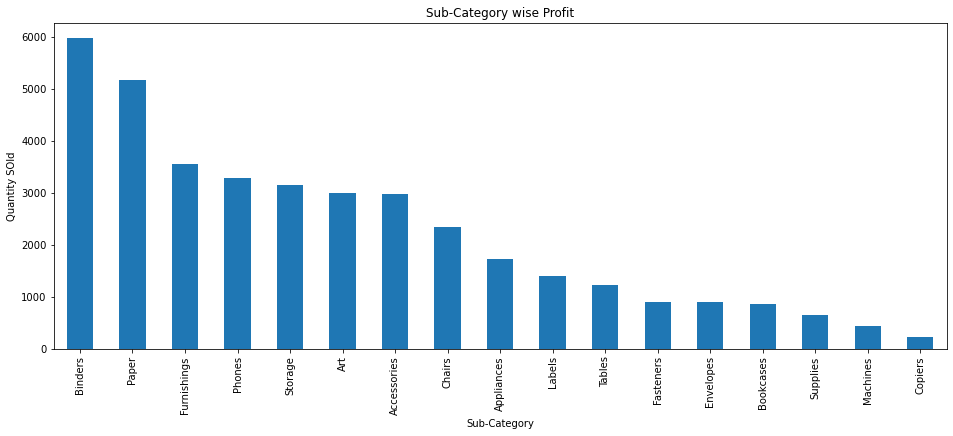

In [75]:
## Plot of Sub-Category wise Quantity
plt.figure(figsize = (16,6))
Report.groupby('Sub-Category').sum().Quantity.sort_values(ascending= False).plot(kind ='bar')
plt.ylabel('Quantity SOld')
plt.title('Sub-Category wise Profit')

In [76]:
# Plotting Shipment mode Vs Sales
Report.groupby('Ship Mode').sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,,
First Class,7498535,84229511,3.514284e+05,5693,253.17,48969.8399
Same Day,2784998,31242093,1.283631e+05,1960,82.75,15891.7589
Second Class,9601997,108192588,4.591936e+05,7423,270.15,57446.6354
Standard Class,30059485,327908460,1.358216e+06,22797,955.02,164088.7875


Text(0.5, 1.0, 'Ship Mode VS Sales')

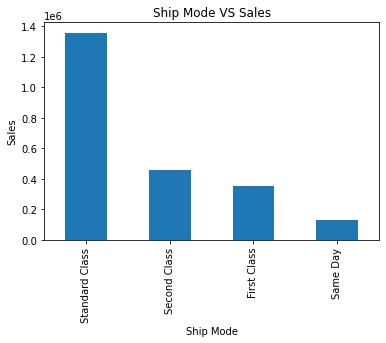

In [82]:
Report.groupby('Ship Mode').sum().Sales.sort_values(ascending= False).plot(kind ='bar')
plt.ylabel('Sales')
plt.title('Ship Mode VS Sales')

# SuperStore 2 Sales Analysis

- What is the overall sales trend 
- What is the Top 10 product by sales
- What are the most selling products
- What is the most preferred ship mode
- Which is the the most profitable Category and Sub-Category

In [86]:
df = pd.read_excel('superstore_sales.xlsx')

In [93]:
df.tail(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51280,TZ-2014-8220,2014-12-31,2015-01-06,Standard Class,Christine Kargatis,Home Office,Dar Es Salaam,Tanzania,Africa,Africa,...,Office Supplies,Labels,"Harbour Creations Removable Labels, Adjustable",49.500,6,0.0,6.8400,2.150,Medium,2014
51281,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,2.060,Medium,2014
51282,UP-2014-4410,2014-12-31,2015-01-04,Standard Class,Guy Thornton,Consumer,Zaporizhzhya,Ukraine,EMEA,EMEA,...,Office Supplies,Labels,"Avery Round Labels, Alphabetical",27.840,4,0.0,6.1200,1.700,Medium,2014
51283,IN-2014-23754,2014-12-31,2015-01-07,Standard Class,Kalyca Meade,Corporate,Guangdong,China,APAC,North Asia,...,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.470,3,0.0,25.3800,1.410,Medium,2014
51284,MX-2014-108574,2014-12-31,2015-01-04,Standard Class,Julia Barnett,Home Office,Tamaulipas,Mexico,LATAM,North,...,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.740,3,0.0,0.6600,1.324,Medium,2014
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [95]:
df.shape

(51290, 21)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [103]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [107]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [109]:
# Descriptive Statistics Summary
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [110]:
df.sales.sum()

12642501.909880001

### What is the overall sales trend

In [113]:
df.order_date.min()

Timestamp('2011-01-01 00:00:00')

In [115]:
df.order_date.max()

Timestamp('2014-12-31 00:00:00')

In [118]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%y-%m'))

In [125]:
df_trend = df.groupby('month_year').sum()['sales'].reset_index()

Text(0.5, 1.0, 'Ship Mode VS Sales')

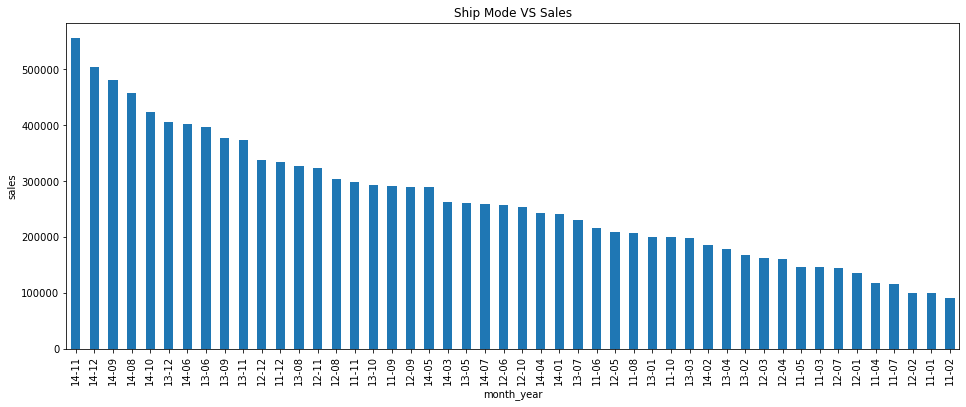

In [129]:
plt.figure(figsize = (16,6))
df_trend.groupby('month_year').sum().sales.sort_values(ascending= False).plot(kind ='bar')
plt.ylabel('sales')
plt.title('Ship Mode VS Sales')

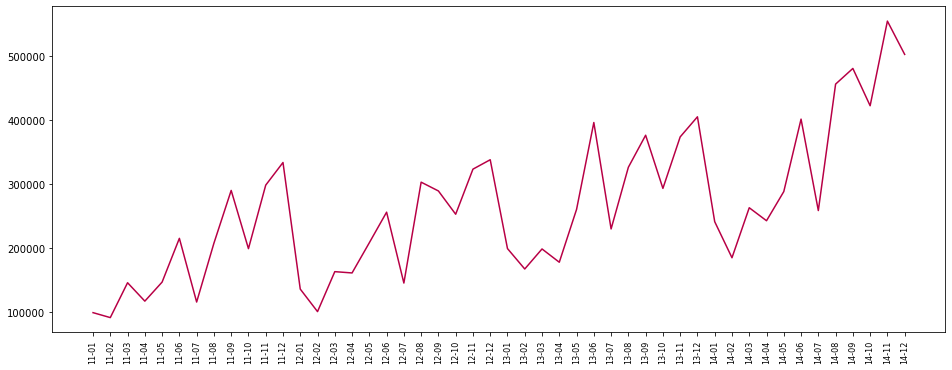

In [145]:
plt.figure(figsize = (16,6))
plt.plot(df_trend['month_year'], df_trend['sales'], color ='#B80045')
plt.xticks(rotation = 90, size =8)
plt.show()

### What is the Top 10 product by sales

In [153]:
pd.DataFrame(df.groupby('product_name').sum().sales.sort_values(ascending= False).head(10))

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [174]:
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [175]:
prod_sales = prod_sales.sort_values(['sales'],ascending= False)

In [176]:
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


### What are the most selling products

In [182]:
pd.DataFrame(df.groupby('product_name').sum().quantity.sort_values(ascending= False).head(10))

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


### What is the most preferred ship mode

In [186]:
df['ship_mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


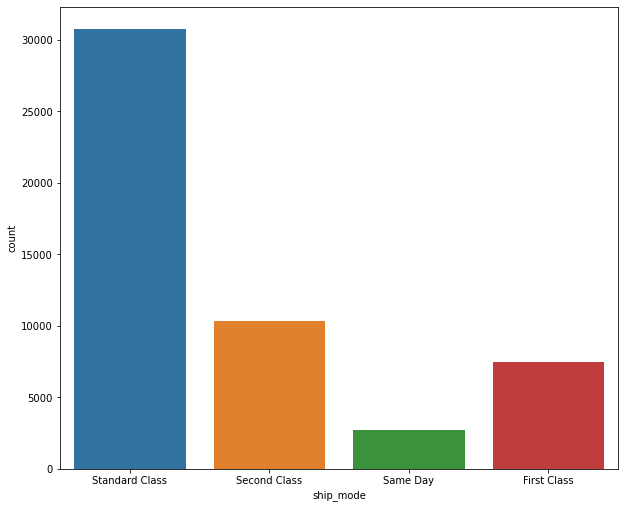

In [200]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['ship_mode'])
plt.show()

### Which is the the most profitable Category and Sub-Category

In [226]:
profit_cat_sub = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

In [232]:
profit_cat_sub.sort_values(['category','profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

In [243]:
profit_cat_sub[profit_cat_sub.profit>160000]

profit
category   sub_category              
Furniture  Bookcases     161924.41950
Technology Copiers       258567.54818
           Phones        216717.00580